Import Libraries

# Import Libraries


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.api as smapi
import tensorflow as tf
import keras.models
import plotly.graph_objects as go
from tensorflow import keras
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, StratifiedKFold  
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree,datasets,svm,kernel_approximation
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer


# Define Functions


In [91]:
def read_data(file):#Read the data from the Excel file
    data = pd.read_excel(file)
    return data



# Question 1
1.	The available data must be imported into your environment of coice. The data must be prepared either in matrix or table format and converted from 5 minute to hourly data.	

In [92]:
#Import the training and testing data csv files into dataframes
Originaltrain = pd.read_csv('Training_Data.csv')
Originaltrain.columns = ['Date', 'Time', '0m', '3m', '6m', '9m', '12m', '15m']
Originaltrain.head()

,Date,Time,0m,3m,6m,9m,12m,15m
0,2014/08/01,10:05,13.15,13.30,13.35,13.35,13.30,13.20
1,2014/08/01,10:10,13.20,13.30,13.35,13.40,13.30,13.25
2,2014/08/01,10:15,13.25,13.35,13.35,13.40,13.30,13.25
3,2014/08/01,10:20,13.25,13.40,13.40,13.40,13.30,13.30
4,2014/08/01,10:25,13.25,13.40,13.40,13.40,13.35,13.30


In [93]:
Originaltest = pd.read_csv('Testing_Data.csv')
Originaltest.columns = ['Date', 'Time', '0m', '3m', '6m', '9m', '12m', '15m']
Originaltest.head()

,Date,Time,0m,3m,6m,9m,12m,15m
0,2014/08/20,09:54:08 AM,17.45,16.80,16.8,15.35,15.70,16.6
1,2014/08/20,09:59:08 AM,17.60,16.60,16.6,15.65,15.75,16.7
2,2014/08/20,10:04:08 AM,17.75,16.60,16.6,15.85,15.85,16.8
3,2014/08/20,10:09:08 AM,17.90,16.60,16.6,16.00,15.90,16.9
4,2014/08/20,10:14:08 AM,18.00,16.75,16.7,16.10,16.00,17.0


In [94]:
train = Originaltrain.groupby(np.arange(len(Originaltrain))//12).mean(numeric_only=True)
train


,0m,3m,6m,9m,12m,15m
0,13.345833,13.462500,13.450000,13.470833,13.375000,13.337500
1,7.375000,6.466667,6.158333,6.900000,6.116667,6.195833
2,2.566667,2.008333,1.541667,1.800000,1.291667,0.775000
3,4.195833,1.783333,1.145833,0.741667,0.604167,0.304167
4,3.695833,1.133333,1.400000,1.358333,1.008333,0.766667
...,...,...,...,...,...,...
167,7.100000,6.129167,5.445833,4.137500,3.304167,6.158333
168,7.845833,6.741667,5.895833,4.475000,3.604167,6.450000
169,8.916667,7.345833,6.325000,4.720833,3.820833,6.795833
170,9.904167,7.829167,6.579167,4.970833,3.920833,6.816667


In [95]:
test = Originaltest.groupby(np.arange(len(Originaltest))//12).mean(numeric_only=True)
test

,0m,3m,6m,9m,12m,15m
0,18.270833,16.862500,16.812500,16.145833,16.104167,17.025000
1,18.600000,17.129167,17.279167,17.075000,16.916667,17.366667
2,19.845833,18.183333,18.454167,18.354167,18.129167,18.058333
3,20.533333,19.079167,19.479167,19.054167,17.495833,17.366667
4,20.254167,18.308333,19.420833,16.054167,13.200000,14.233333
...,...,...,...,...,...,...
141,4.762500,4.183333,3.533333,2.904167,3.008333,4.100000
142,5.166667,4.354167,3.845833,3.462500,3.329167,4.491667
143,6.341667,5.183333,4.941667,4.291667,3.733333,5.358333
144,8.883333,7.370833,7.408333,7.575000,7.029167,7.391667


# Question 2
2.	Generate plots of the temperatures at the different locations as functions of time, using the same axes for all locations.  Repeat this on different axes for the training and test sets.

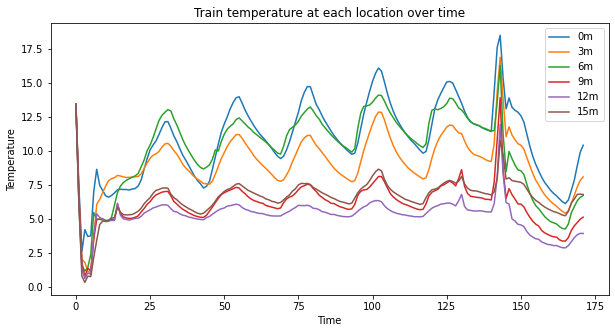

In [96]:
#Generate plots of the temperatures at the different locations as functions of time, using the same axes for all locations.  Repeat this on different axes for the training and test sets.
#Plot the temperatures at each location as a function of time on the same axes

plt.figure(figsize=(10,5))
plt.plot(train['0m'], label = '0m')
plt.plot(train['3m'], label = '3m')
plt.plot(train['6m'], label = '6m')
plt.plot(train['9m'], label = '9m')
plt.plot(train['12m'], label = '12m')
plt.plot(train['15m'], label = '15m')
plt.title('Train temperature at each location over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()



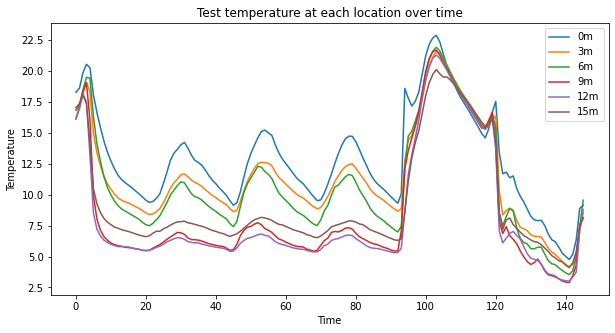

In [97]:
plt.figure(figsize=(10,5))
plt.plot(test['0m'], label = '0m')
plt.plot(test['3m'], label = '3m')
plt.plot(test['6m'], label = '6m')
plt.plot(test['9m'], label = '9m')
plt.plot(test['12m'], label = '12m')
plt.plot(test['15m'], label = '15m')
plt.title('Test temperature at each location over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


# Question 3
3.	Calculate autocorrelations and partial autocorrelations (in Matlab by using the autocorr and parcorr instructions, in Python use similar functions from a library like Statsmodels) for the temperatures at 0 and 15 m from the doors over a time lag of at least two days and determine at which time lags there are significant correlations and partial correlations between each variable and delayed versions of itself.

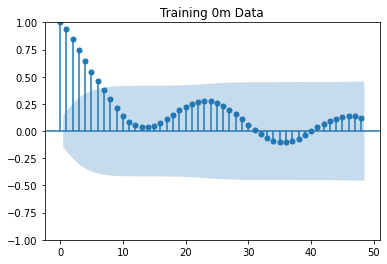

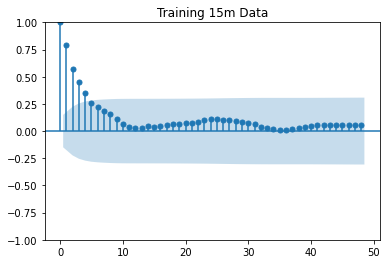

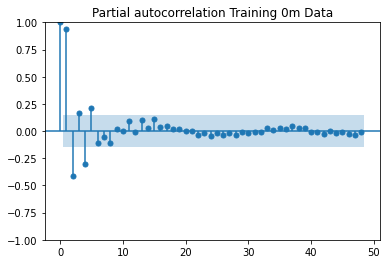

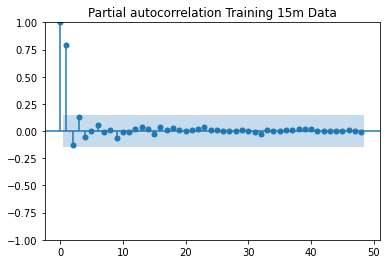

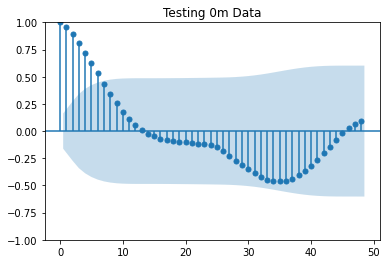

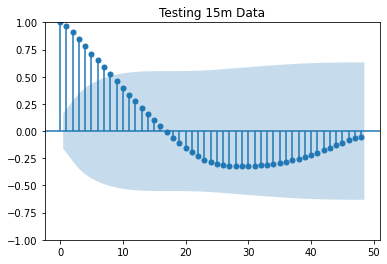

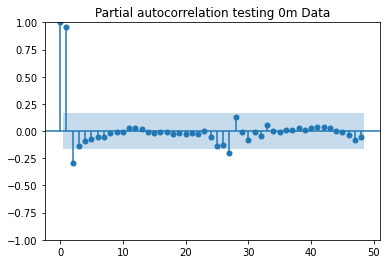

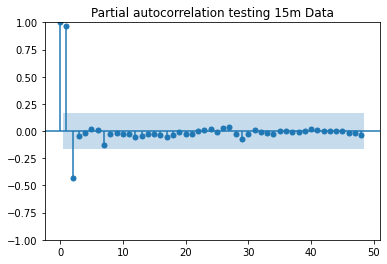

In [98]:

Trainlag0m = sm.tsa.acf(train['0m'], nlags = 48)
Trainlag15m = sm.tsa.acf(train['15m'], nlags = 48)
#Plot the data on seperate axes
fig =  tsaplots.plot_acf(train['0m'], lags = 48, title = 'Training 0m Data')
plt.show()
fig =  tsaplots.plot_acf(train['15m'], lags = 48, title = 'Training 15m Data')
plt.show()
fig =  tsaplots.plot_pacf(train['0m'], lags = 48, method = 'ywm', title = 'Partial autocorrelation Training 0m Data')
plt.show()
fig =  tsaplots.plot_pacf(train['15m'], lags = 48, method = 'ywm', title = 'Partial autocorrelation Training 15m Data')
plt.show()

#Test
Testlag0m = sm.tsa.acf(test['0m'], nlags = 48)
Testlag15m = sm.tsa.acf(test['15m'], nlags = 48)
#Plot the data on seperate axes
fig =  tsaplots.plot_acf(test['0m'], lags = 48, title = 'Testing 0m Data')
plt.show()
fig =  tsaplots.plot_acf(test['15m'], lags = 48, title = 'Testing 15m Data')
plt.show()
fig =  tsaplots.plot_pacf(test['0m'], lags = 48, method = 'ywm', title = 'Partial autocorrelation testing 0m Data')
plt.show()
fig =  tsaplots.plot_pacf(test['15m'], lags = 48, method = 'ywm', title = 'Partial autocorrelation testing 15m Data')
plt.show()



# Question 4 a
4.	Temporal models must be developed, using ARIMA techniques, by predicting the temperatures at 0 and 15 m from the doors into the future, using historical measured values as predictors.  The quality of the models must be tested using MSE and correlation between target and predicted variables.  The prediction must be done over a period of 24 hours into the future.  Assume that no further differencing is required to obtain stationary time series.	

a)	Apply the rules as explained in wikipedia at https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method (also have a look at the information under partial autocorrelation and ARIMA), by using the autocorrelation and partial autocorrelation results, to determine the correct p and q values to be used in the ARIMA models. Create a table for the p and q values for both variables to be predicted.

In [99]:
#P val is the max y value of the partial autocorrelation plots
#Q is the number of values where the candle exceeds the confidence interval
trainp0m = 1   # P value for 0m 
trainp15m = 1  # P value for 15m
trainq0m = 6   # Q value for 0m
trainq15m = 2  # Q value for 15m
testp0m = 1    # P value for 0m
testp15m = 1   # P value for 15m
testq0m = 4   # Q value for 0m
testq15m = 3   # Q value for 15m

#Display all the p and q values and the respective locations, name the columns
trainp = [trainp0m, trainp15m]
trainq = [trainq0m, trainq15m]
testp = [testp0m, testp15m]
testq = [testq0m, testq15m]
locations = ['0m', '15m']
trainp = pd.DataFrame(trainp, index = locations, columns = ['P value'])
trainq = pd.DataFrame(trainq, index = locations, columns = ['Q value'])
testp = pd.DataFrame(testp, index = locations, columns = ['P value'])
testq = pd.DataFrame(testq, index = locations, columns = ['Q value'])
print('Training ')
print(trainp)
print('Training ')
print(trainq)
print('Testing ')
print(testp)
print('Testing ')
print(testq)



Training 
     P value
0m         1
15m        1
Training 
     Q value
0m         6
15m        2
Testing 
     P value
0m         1
15m        1
Testing 
     Q value
0m         4
15m        3


# Question 4 b
b)	Apply non-seasonal ARIMA models, using the above p and q values, to predict the temperatures at 0 and 15 m over a period of 24 hours into the future. Use the training set to extract the model and then apply it to both the last 24 hours of the training set, as well as to the complete test set, to perform the prediction. Use the correlation between target and predicted variables, as well as the coefficient of determination, to evaluate the quality of the prediction.

C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                     0m   No. Observations:                  172
Model:                 ARIMA(1, 1, 6)   Log Likelihood                -176.213
Date:                Mon, 21 Nov 2022   AIC                            368.425
Time:                        20:46:19   BIC                            393.558
Sample:                             0   HQIC                           378.623
                                - 172                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5830      0.109      5.360      0.000       0.370       0.796
ma.L1          0.2737      0.113      2.429      0.015       0.053       0.495
ma.L2         -0.4821      0.109     -4.434      0.0

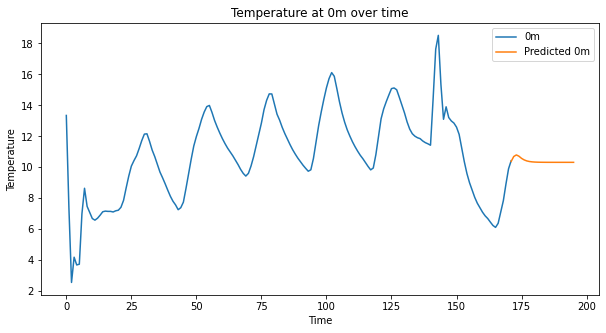

C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    15m   No. Observations:                  172
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -143.609
Date:                Mon, 21 Nov 2022   AIC                            295.218
Time:                        20:46:19   BIC                            307.785
Sample:                             0   HQIC                           300.317
                                - 172                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5869      0.089      6.562      0.000       0.412       0.762
ma.L1          0.4785      0.097      4.927      0.000       0.288       0.669
ma.L2         -0.0797      0.139     -0.573      0.5

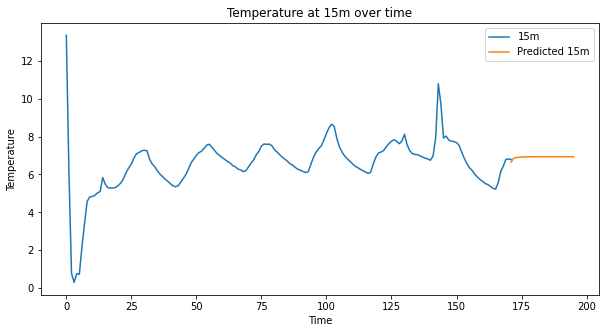

In [100]:

#Using a non-seasonal ARIMA model with the already calculated p and q values to predict the temps at 0m and 15m 24 hours into the future.  Repeat this for the training and test sets.

#Train
#Train model
#0m
trainmodel0m = ARIMA(train['0m'], order = (trainp0m, 1, trainq0m))
trainmodel0m = trainmodel0m.fit()
print(trainmodel0m.summary())
NSpredict0m = trainmodel0m.predict(start = 171, end = 171+24, typ = 'levels')
#Plot the trainmodel0m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(train['0m'], label = '0m')
plt.plot(NSpredict0m, label = 'Predicted 0m')
plt.title('Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


#15m
trainmodel15m = ARIMA(train['15m'], order = (trainp15m, 1, trainq15m))
trainmodel15m = trainmodel15m.fit()
print(trainmodel15m.summary())
NSpredict15mtrain = trainmodel15m.predict(start = 171, end = 171+24, typ = 'levels')
#Plot the trainmodel0m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(train['15m'], label = '15m')
plt.plot(NSpredict15mtrain, label = 'Predicted 15m')
plt.title('Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()



                               SARIMAX Results                                
Dep. Variable:                     0m   No. Observations:                  146
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -201.349
Date:                Mon, 21 Nov 2022   AIC                            414.698
Time:                        20:46:19   BIC                            432.559
Sample:                             0   HQIC                           421.956
                                - 146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9477      0.146      6.499      0.000       0.662       1.233
ma.L1         -0.6517     18.399     -0.035      0.972     -36.712      35.409
ma.L2         -0.2409      6.398     -0.038      0.9

C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


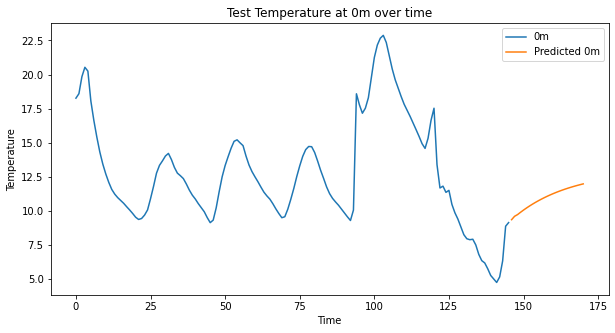

                               SARIMAX Results                                
Dep. Variable:                    15m   No. Observations:                  146
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -130.670
Date:                Mon, 21 Nov 2022   AIC                            271.340
Time:                        20:46:20   BIC                            286.224
Sample:                             0   HQIC                           277.388
                                - 146                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.619      1.370      0.171      -0.365       2.060
ma.L1          0.0892      0.628      0.142      0.887      -1.142       1.320
ma.L2         -0.4721      0.602     -0.784      0.4

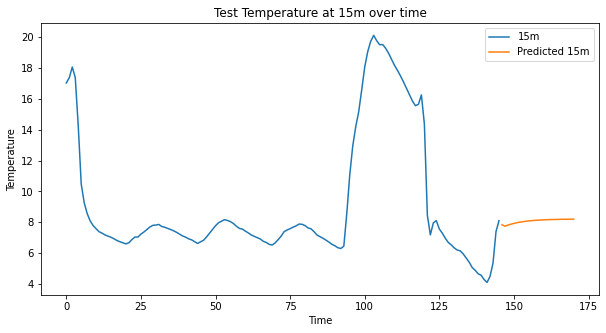

In [101]:
#Test
#Train the model
#0m
testmodel0m = ARIMA(test['0m'], order = (testp0m, 1, testq0m))
testmodel0m = testmodel0m.fit()
print(testmodel0m.summary())
NSpredict0mtest = testmodel0m.predict(start = 145, end = 145+24, typ = 'levels')
#Plot the testmodel0m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(test['0m'], label = '0m')
plt.plot(NSpredict0mtest, label = 'Predicted 0m')
plt.title('Test Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

#15m
testmodel15m = ARIMA(test['15m'], order = (testp15m, 1, testq15m))
testmodel15m = testmodel15m.fit()
print(testmodel15m.summary())
NSpredict15mtest = testmodel15m.predict(start = 145, end = 145+24, typ = 'levels')
#Plot the testmodel5m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(test['15m'], label = '15m')
plt.plot(NSpredict15mtest, label = 'Predicted 15m')
plt.title('Test Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Question 4 c
c)	Apply a seasonal ARIMA model, with 24 hours as seasonal period, to repeat the above prediction exercise.  Compare the results with those of the non-seasonal models and make comments.


C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                 0m   No. Observations:                  172
Model:             SARIMAX(1, 0, 6)x(1, 0, 6, 24)   Log Likelihood                -178.901
Date:                            Mon, 21 Nov 2022   AIC                            387.802
Time:                                    20:48:33   BIC                            435.014
Sample:                                         0   HQIC                           406.957
                                            - 172                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9983      0.009    112.417      0.000       0.981       1.016
ma.L1          0.8511      0.060   

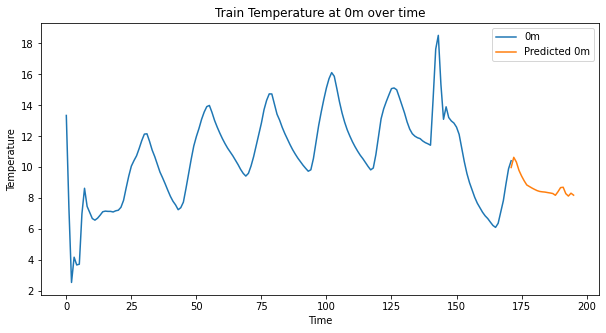

C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                15m   No. Observations:                  172
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 24)   Log Likelihood                -149.770
Date:                            Mon, 21 Nov 2022   AIC                            313.540
Time:                                    20:48:54   BIC                            334.473
Sample:                                         0   HQIC                           322.046
                                            - 172                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8712      0.066     13.253      0.000       0.742       1.000
ma.L1         -0.2401     64.719   

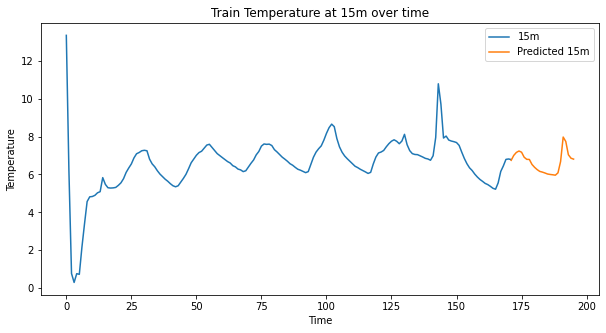

In [102]:
#Using a seasonal ARIMA model with the already calculated p and q values to predict the temps at 0m and 15m 24 hours into the future.  Repeat this for the training and test sets.
#Train
#0m
trainmodel0m = SARIMAX(train['0m'], order = (trainp0m, 0, trainq0m), seasonal_order = (trainp0m, 0, trainq0m, 24))
trainmodel0m = trainmodel0m.fit()
print(trainmodel0m.summary())
Spredict0mtrain = trainmodel0m.predict(start = 171, end = 171+24, typ = 'levels')
#Plot the trainmodel0m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(train['0m'], label = '0m')
plt.plot(Spredict0mtrain, label = 'Predicted 0m')
plt.title('Train Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


#15m
trainmodel15m = SARIMAX(train['15m'], order = (trainp15m, 1, trainq15m), seasonal_order = (trainp15m, 1, trainq15m, 24))
trainmodel15m = trainmodel15m.fit()
print(trainmodel15m.summary())
Spredict15mtrain = trainmodel15m.predict(start = 171, end = 171+24, typ = 'levels')
#Plot the trainmodel0m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(train['15m'], label = '15m')
plt.plot(Spredict15mtrain, label = 'Predicted 15m')
plt.title('Train Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()




C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                 0m   No. Observations:                  146
Model:             SARIMAX(1, 0, 4)x(1, 0, 4, 24)   Log Likelihood                -203.682
Date:                            Mon, 21 Nov 2022   AIC                            429.365
Time:                                    20:50:08   BIC                            462.185
Sample:                                         0   HQIC                           442.700
                                            - 146                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9870      0.014     71.068      0.000       0.960       1.014
ma.L1          0.2961      0.048   

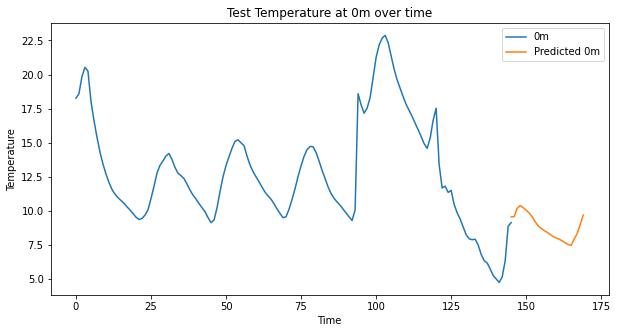

C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Willie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                15m   No. Observations:                  146
Model:             SARIMAX(1, 1, 3)x(1, 1, 3, 24)   Log Likelihood                -128.804
Date:                            Mon, 21 Nov 2022   AIC                            275.608
Time:                                    20:50:55   BIC                            300.770
Sample:                                         0   HQIC                           285.827
                                            - 146                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8554      0.612      1.398      0.162      -0.344       2.055
ma.L1          0.0784      0.642   

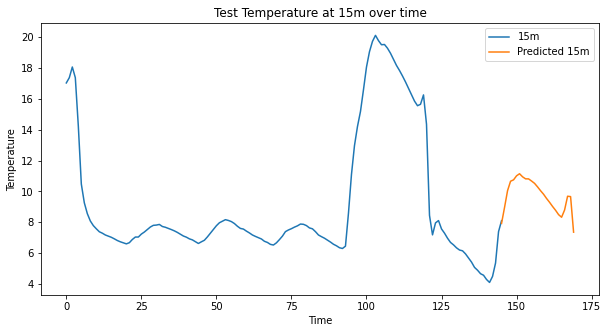

In [103]:
#Using a seasonal ARIMA model with the already calculated p and q values to predict the temps at 0m and 15m 24 hours into the future.  Repeat this for the training and test sets.
#0m
testmodel0m = SARIMAX(test['0m'], order = (testp0m, 0, testq0m), seasonal_order = (testp0m, 0, testq0m, 24))
testmodel0m = testmodel0m.fit()
print(testmodel0m.summary())
Spredict0mtest = testmodel0m.predict(start = 145, end = 145+24, typ = 'levels')
#Plot the testmodel0m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(test['0m'], label = '0m')
plt.plot(Spredict0mtest, label = 'Predicted 0m')
plt.title('Test Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


#15m
testmodel15m = SARIMAX(test['15m'], order = (testp15m, 1, testq15m), seasonal_order = (testp15m, 1, testq15m, 24))
testmodel15m = testmodel15m.fit()
print(testmodel15m.summary())
Spredict15mtest = testmodel15m.predict(start = 145, end = 145+24, typ = 'levels')
#Plot the testmodel0m and predict0m data on the same plot
plt.figure(figsize=(10,5))
plt.plot(test['15m'], label = '15m')
plt.plot(Spredict15mtest, label = 'Predicted 15m')
plt.title('Test Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Question 5 
5.	Use time series neural networks to extract temporal prediction models for the same variables as above, over the same prediction horizon and using the same assessment techniques.  In Matlab you can use the narnet instruction to create the network, as well as the preparets, train, perform, timedelaynet, and closeloop instructions to train and evaluate the network and do the prediction. Compare your results with those from the ARIMA techniques and comment.

1/1 [==============================] - 0s 24ms/step


,0m
0,13.345834
1,7.375000
2,2.566667
3,4.195833
4,3.695833
...,...
167,7.100000
168,7.845833
169,8.916667
170,9.904166


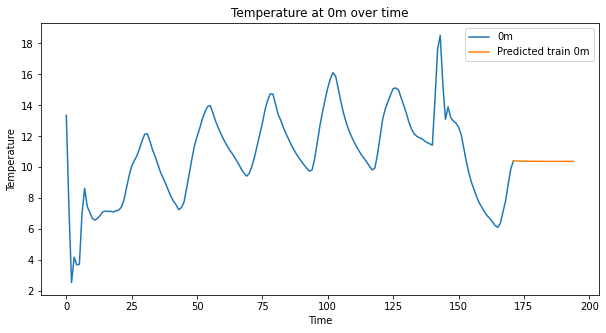

In [104]:
#With the use of a time series neural network model to predict the temps at 0m and 15m. Predict the temps 24 hours after the last data point in the training set.
#0m train
df = train['0m'].to_frame().astype('float32')
y = df.values.reshape(- 1, 1)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)
# generate the training sequences
n_forecast = 1 
n_lookback = 1
X = []
Y = []
for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
X = np.array(X)
Y = np.array(Y)
# train the model
tf.random.set_seed(0)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=128, validation_split=0.2, verbose=0)
# generate the multi-step forecasts
n_future = 24
y_future0mtrain = []
x_pred = X[-1:, :, :]  # last observed input sequence
y_pred = Y[-1]         # last observed target value
for i in range(n_future):
    # feed the last forecast back to the model as an input
    x_pred = np.append(x_pred[:, 1:, :], y_pred.reshape(1, 1, 1), axis=1)
    # generate the next forecast
    y_pred = model.predict(x_pred)
    # save the forecast
    y_future0mtrain.append(y_pred.flatten()[0])
# transform the forecasts back to the original scale
y_future0mtrain = np.array(y_future0mtrain).reshape(-1, 1)
y_future0mtrain = scaler.inverse_transform(y_future0mtrain)
display(df)
#Display the y_future0mtrain data and the train['0m'] data on the same plot starting from 0 to 171+24 hours
plt.figure(figsize=(10,5))
plt.plot(train['0m'], label = '0m')
plt.plot(range(171, 171+24), y_future0mtrain, label = 'Predicted train 0m')
plt.title('Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()





1/1 [==============================] - 0s 22ms/step


,15m
0,13.337500
1,6.195833
2,0.775000
3,0.304167
4,0.766667
...,...
167,6.158333
168,6.450000
169,6.795833
170,6.816667


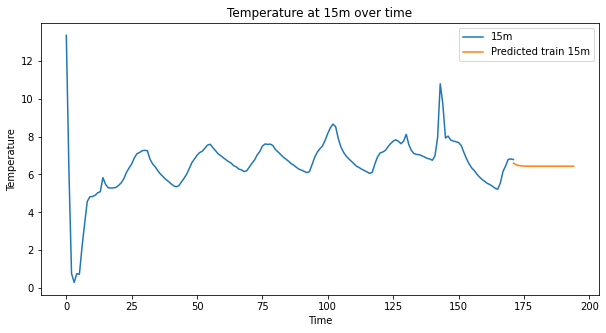

In [105]:
#15m train
df = train['15m'].to_frame().astype('float32')
y = df.values.reshape(- 1, 1)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)
# generate the training sequences
n_forecast = 1 
n_lookback = 1
X = []
Y = []
for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
X = np.array(X)
Y = np.array(Y)
# train the model
tf.random.set_seed(0)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=128, validation_split=0.2, verbose=0)
# generate the multi-step forecasts
n_future = 24
y_future15mtrain = []
x_pred = X[-1:, :, :]  # last observed input sequence
y_pred = Y[-1]         # last observed target value
for i in range(n_future):

    # feed the last forecast back to the model as an input
    x_pred = np.append(x_pred[:, 1:, :], y_pred.reshape(1, 1, 1), axis=1)

    # generate the next forecast
    y_pred = model.predict(x_pred)

    # save the forecast
    y_future15mtrain.append(y_pred.flatten()[0])
# transform the forecasts back to the original scale
y_future15mtrain = np.array(y_future15mtrain).reshape(-1, 1)
y_future15mtrain = scaler.inverse_transform(y_future15mtrain)
display(df)
#Display the y_future15mtrain data and the train['0m'] data on the same plot starting from 0 to 171+24 hours
plt.figure(figsize=(10,5))
plt.plot(train['15m'], label = '15m')
plt.plot(range(171, 171+24), y_future15mtrain, label = 'Predicted train 15m')
plt.title('Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


1/1 [==============================] - 0s 28ms/step


,0m
0,18.270834
1,18.600000
2,19.845833
3,20.533333
4,20.254168
...,...
141,4.762500
142,5.166667
143,6.341667
144,8.883333


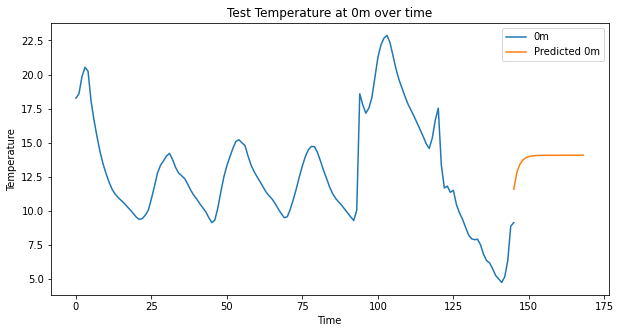

In [113]:
#With the use of a time series neural network model to predict the temps at 0m and 15m. Predict the temps 24 hours after the last data point in the training set.
#0m test
df = test['0m'].to_frame().astype('float32')
y = df.values.reshape(- 1, 1)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)
# generate the training sequences
n_forecast = 1 
n_lookback = 1
X = []
Y = []
for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
X = np.array(X)
Y = np.array(Y)
# train the model
tf.random.set_seed(0)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=128, validation_split=0.2, verbose=0)
# generate the multi-step forecasts
n_future = 24
y_future0mtest = []
x_pred = X[-1:, :, :]  # last observed input sequence
y_pred = Y[-1]         # last observed target value
for i in range(n_future):
    # feed the last forecast back to the model as an input
    x_pred = np.append(x_pred[:, 1:, :], y_pred.reshape(1, 1, 1), axis=1)
    # generate the next forecast
    y_pred = model.predict(x_pred)
    # save the forecast
    y_future0mtest.append(y_pred.flatten()[0])
# transform the forecasts back to the original scale
y_future0mtest = np.array(y_future0mtest).reshape(-1, 1)
y_future0mtest = scaler.inverse_transform(y_future0mtest)
display(df)
#Display the y_future0mtest data and the train['0m'] data on the same plot starting from 0 to 171+24 hours
plt.figure(figsize=(10,5))
plt.plot(test['0m'], label = '0m')
plt.plot(range(145, 145+24), y_future0mtest, label = 'Predicted 0m')
plt.title('Test Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

1/1 [==============================] - 0s 23ms/step


,15m
0,17.025000
1,17.366667
2,18.058332
3,17.366667
4,14.233334
...,...
141,4.100000
142,4.491667
143,5.358333
144,7.391667


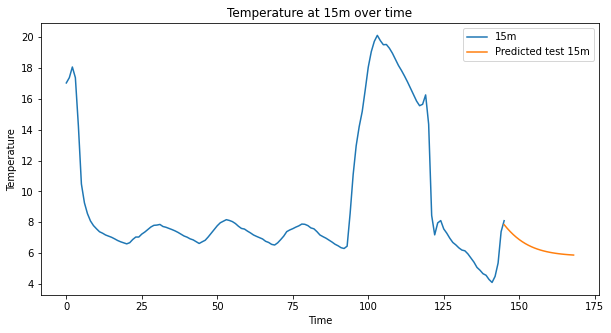

In [107]:
#15m test
df = test['15m'].to_frame().astype('float32')
y = df.values.reshape(- 1, 1)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)
# generate the training sequences
n_forecast = 1 
n_lookback = 1
X = []
Y = []
for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
X = np.array(X)
Y = np.array(Y)
# train the model
tf.random.set_seed(0)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=128, validation_split=0.2, verbose=0)
# generate the multi-step forecasts
n_future = 24
y_future15mtest = []
x_pred = X[-1:, :, :]  # last observed input sequence
y_pred = Y[-1]         # last observed target value
for i in range(n_future):
    # feed the last forecast back to the model as an input
    x_pred = np.append(x_pred[:, 1:, :], y_pred.reshape(1, 1, 1), axis=1)
    # generate the next forecast
    y_pred = model.predict(x_pred)
    # save the forecast
    y_future15mtest.append(y_pred.flatten()[0])
# transform the forecasts back to the original scale
y_future15mtest = np.array(y_future15mtest).reshape(-1, 1)
y_future15mtest = scaler.inverse_transform(y_future15mtest)
display(df)
#Display the y_future15mtest data and the train['0m'] data on the same plot starting from 0 to 171+24 hours
plt.figure(figsize=(10,5))
plt.plot(test['15m'], label = '15m')
plt.plot(range(145, 145+24), y_future15mtest , label = 'Predicted test 15m')
plt.title('Test Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

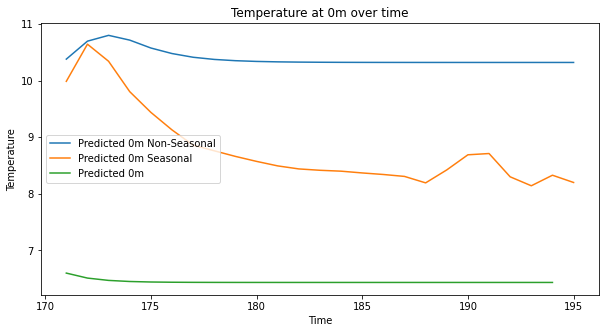

In [114]:
#Now we compare the prediction models for the 0m and 15m temps, with the seasonal prediction, Non-seasonal prediction, Arima model prediction all on the same graph 
#0m train
plt.figure(figsize=(10,5))
plt.plot(NSpredict0m, label = 'Predicted 0m Non-Seasonal')
plt.plot(Spredict0m, label = 'Predicted 0m Seasonal')
plt.plot(range(171, 171+24), y_future, label = 'Predicted 0m')
plt.title('Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()



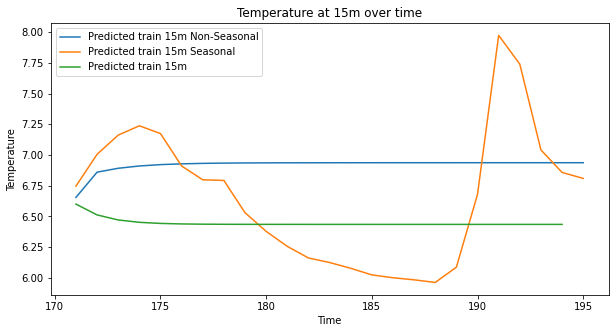

In [115]:
#15m train
plt.figure(figsize=(10,5))
plt.plot(NSpredict15mtrain, label = 'Predicted train 15m Non-Seasonal')
plt.plot(Spredict15mtrain, label = 'Predicted train 15m Seasonal')
plt.plot(range(171, 171+24), y_future, label = 'Predicted train 15m')
plt.title('Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

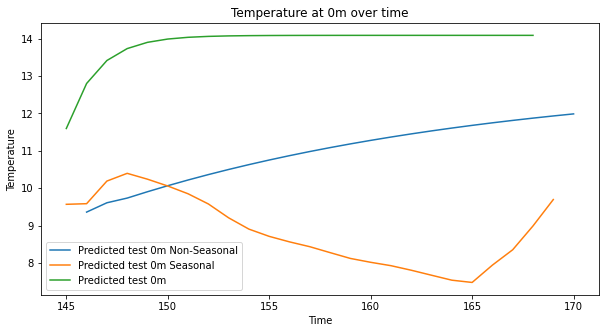

In [116]:
#0m test
plt.figure(figsize=(10,5))
plt.plot(NSpredict0mtest, label = 'Predicted test 0m Non-Seasonal')
plt.plot(Spredict0mtest, label = 'Predicted test 0m Seasonal')
plt.plot(range(145, 145+24), y_future0mtest, label = 'Predicted test 0m')
plt.title('Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


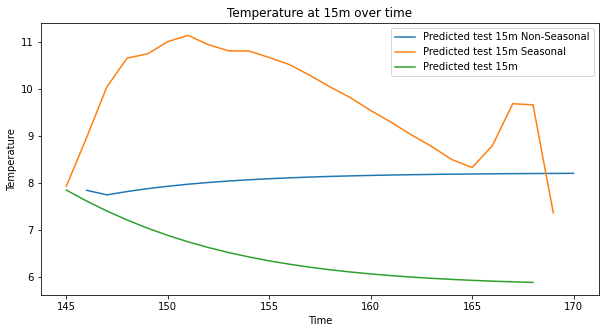

In [117]:
#15m test
plt.figure(figsize=(10,5))
plt.plot(NSpredict15mtest, label = 'Predicted test 15m Non-Seasonal')
plt.plot(Spredict15mtest, label = 'Predicted test 15m Seasonal')
plt.plot(range(145, 145+24), y_future15mtest, label = 'Predicted test 15m')
plt.title('Temperature at 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Question 6
6.	The purpose of this question is to detect from the forecast vs actual temperature that the doors were opened.  Use the ARIMA technique as derived above to predict temperature at both locations 2 hours into the future.  For both the training and test sets, repeat this as from the time that the cyclic behaviour started (that should be approximately 24 hours after the start of the data) in one hour intervals (i.e. repeat the forecast after every hour).   In each case compare the forecast with the actual temperatures at the same times as the times for which the forecast was generated.  Determine when it would first be detected that the doors were opened by using the following rule: the first time when the forecast differed from the actual tempeature by more than 2 degrees. 

In [121]:
#Determine when the predicted temp values deviate more than 2 degrees from the actual temp values.
#train
#  0m
for i in range(0, 24):
  if abs(Spredict0mtrain[i] - train['0m'][i+171]) > 2:
    print("The predicted temp at 0m is ", Spredict0mtrain[i], " at time ", i, " and the actual temp is ", train['0m'][i+171])
    #Add the time at which the predicted temps deviate to a dataframe
    dfdev = df.append({'Time': i, 'Temp': Spredict0mtrain[i]}, ignore_index=True)
  if abs(NSpredict0m[i] - train['0m'][i+171]) > 2:
    print("The predicted temp at 0m is ", NSpredict0m[i], " at time ", i, " and the actual temp is ", train['0m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': Spredict0mtrain[i]}, ignore_index=True)
  if abs(y_future0mtrain[i] - train['0m'][i+171]) > 2:
    print("The predicted temp at 0m is ", y_future0mtrain[i], " at time ", i, " and the actual temp is ", train['0m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': Spredict0mtrain[i]}, ignore_index=True)
#  15m
for i in range(0, 24):
  if abs(Spredict15mtrain[i] - train['15m'][i+171]) > 2:
    print("The predicted temp at 15m is ", Spredict15mtrain[i], " at time ", i, " and the actual temp is ", train['15m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': Spredict0mtrain[i]}, ignore_index=True)
  if abs(NSpredict15mtrain[i] - train['15m'][i+171]) > 2:
    print("The predicted temp at 15m is ", NSpredict15mtrain[i], " at time ", i, " and the actual temp is ", train['15m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': Spredict0mtrain[i]}, ignore_index=True)
  if abs(y_future15mtrain[i] - train['15m'][i+171]) > 2:
    print("The predicted temp at 15m is ", y_future15mtrain[i], " at time ", i, " and the actual temp is ", train['15m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': Spredict0mtrain[i]}, ignore_index=True)
#Now display where the predicted temps deviate from the actual temps on the same graph
plt.figure(figsize=(10,5))
plt.plot(dfdev['Time'], dfdev['Temp'], label = 'Predicted temp deviated')
plt.plot(range(171, 171+24), train['0m'], label = 'Actual temp')
plt.title('Temperature at 0m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


KeyError: 0

# Question 7 
7.	The purpose of this question is to determine how soon it can be forecast that the future temperature will exceed a predetermined threshold (in this case 16 degrees Celcius).  Use only the training set at the container doors.  It can be seen from the data that 16 degrees is exceeded at hour 104.  Use the ARIMA technique as derived above to predict temperature as from the present time, starting at 24 hours, until the end of the period when the cyclic behaviour stopped (that would be at approximately 120 hours).  In each case determine if the forecast temperature exceeds 16 degrees at any time over the forecast period, and when this is expected to occur for the first time.  Determine the first hour of generating a forecast when the forecast will predict that 16 degrees will be exceeded, and where the time at which this is predicted to happen corresponds to the hour when it actually happened. 	

ValueError: x and y must have same first dimension, but have shapes (24,) and (172,)

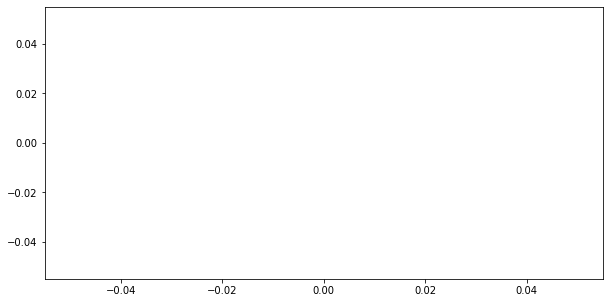

In [122]:
#Using the ARIMA prediction data, store in a dataframe when the data correctly predicted the temp at 0m and 15m to exceed 16 degrees. It can only be stored if the actual temp did reach 16 degrees.
#Seasonal
dfdev = pd.DataFrame(columns=['Time', 'Temp'])
#  0m
for i in range(0, 24):
  if y_future0mtrain[i] > 16 and train['0m'][i+171] > 16:
    print("The predicted temp at 0m is ", y_future0mtrain[i], " at time ", i, " and the actual temp is ", train['0m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': Spredict0mtrain[i]}, ignore_index=True)
#  15m
for i in range(0, 24):
  if y_future15mtrain[i] > 16 and train['15m'][i+171] > 16:
    print("The predicted temp at 15m is ", y_future15mtrain[i], " at time ", i, " and the actual temp is ", train['15m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': Spredict15mtrain[i]}, ignore_index=True)

#Non-Seasonal
#  0m
for i in range(0, 24):
  if y_future0mtrain[i] > 16 and train['0m'][i+171] > 16:
    print("The predicted temp at 0m is ", y_future0mtrain[i], " at time ", i, " and the actual temp is ", train['0m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': NSpredict0mtrain[i]}, ignore_index=True)
#  15m
for i in range(0, 24):
  if y_future15mtrain[i] > 16 and train['15m'][i+171] > 16:
    print("The predicted temp at 15m is ", y_future15mtrain[i], " at time ", i, " and the actual temp is ", train['15m'][i+171])
    dfdev = df.append({'Time': i, 'Temp': NSpredict15mtrain[i]}, ignore_index=True)

#Now display the graph where both the actual and predicted temps exceeded 16 degrees.
plt.figure(figsize=(10,5))
plt.plot(dfdev['Time'], dfdev['Temp'], label = 'Predicted temp > 16 degrees')
plt.plot(range(171, 171+24), train['0m'], label = 'Actual temp at 0m')
plt.plot(range(171, 171+24), train['15m'], label = 'Actual temp at 15m')
plt.title('Temperature at 0m and 15m over time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()
